# Deep Learning aplicado a un guión de película

In [1]:
import pandas as pd

## Importación del guión a Df

In [2]:
# Leer el archivo CSV
df = pd.read_csv("subtitulos.csv", encoding="utf-8")

In [3]:
# Mostrar todo el contenido en varias filas para cada columna
pd.set_option('display.max_colwidth', None)
df.sample(5)

,inicio,fin,subtitulo
543,"00:44:14,486","00:44:16,154",...en tu hombro...
381,"00:28:55,564","00:28:59,860",- ¿Qué vas a hacer Jerry? - ¡Enséñame el dinero!
79,"00:06:09,046","00:06:12,174",Odiaba mi lugar en el mundo.
550,"00:44:37,177","00:44:40,514","...hace que te quiera cielo, ¿sabes?"
145,"00:11:57,828","00:12:00,582","""Diosa de la Escalada..."


In [4]:
df.shape

(1486, 3)

## NLP

In [5]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import string

In [6]:
# Cargar modelo de español
nlp = spacy.load("es_core_news_sm")

### Limpieza

Genero columna 'subtituloLimpio' en minúsculas y sin puntuación

In [7]:
# Función para limpiar el texto: convertir a minúsculas y eliminar puntuación
def limpiar_texto1(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

In [8]:
import re

def limpiar_texto2(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres no deseados pero mantener `?`, `%`
    texto = re.sub(r'[^\w\s?%¿!¡]', '', texto)
    # Eliminar espacios redundantes
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [9]:
# Aplicar limpieza al subtítulo
df['subtituloLimpio2'] = df['subtitulo'].apply(limpiar_texto2)

### Tokenización

Tokenizo los subtítulos en una nueva columna 'tokens'.

In [10]:
# Tokenizar cada subtítulo usando SpaCy
df["tokens"] = df["subtituloLimpio2"].apply(lambda text: [token.text for token in nlp(text)])

In [11]:
# Limpieza de tokens en blanco
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token.strip() != ""])

Comparativa

In [12]:
df[["subtitulo","subtituloLimpio2", "tokens"]].sample(5)

,subtitulo,subtituloLimpio2,tokens
914,Vámonos.,vámonos,[vámonos]
1125,Todavía no.,todavía no,"[todavía, no]"
1227,"Pensaba: ""Espero que no se lesione"".",pensaba espero que no se lesione,"[pensaba, espero, que, no, se, lesione]"
339,- Ahora quieres dólares de Arizona. - Exactamente.,ahora quieres dólares de arizona exactamente,"[ahora, quieres, dólares, de, arizona, exactamente]"
325,Bob Sugar dice que salgo perdiendo contigo.,bob sugar dice que salgo perdiendo contigo,"[bob, sugar, dice, que, salgo, perdiendo, contigo]"


### Sin Stopwords

Genero columna 'tokensSinStopwords'

In [13]:
# Eliminar stopwords de los tokens
df["tokensSinStopwords"] = df["tokens"].apply(lambda tokens: [token for token in tokens if not nlp.vocab[token].is_stop])
# df['tokensSinStopwords'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in STOP_WORDS])

In [14]:
df[["subtitulo", "tokens","tokensSinStopwords"]].sample(5)

,subtitulo,tokens,tokensSinStopwords
660,Cualquiera te habría abandonado ya...,"[cualquiera, te, habría, abandonado, ya]","[cualquiera, habría, abandonado]"
542,¿Sabes lo que fue fantástico allí abajo? Que descargaras ese chip...,"[¿, sabes, lo, que, fue, fantástico, allí, abajo, ?, que, descargaras, ese, chip]","[¿, fantástico, abajo, ?, descargaras, chip]"
1195,- Creo que sí. - De acuerdo.,"[creo, que, sí, de, acuerdo]",[]
391,Estos peces tienen modales.,"[estos, peces, tienen, modales]","[peces, modales]"
820,"- ¿Quan? ¿Es tu palabra? - Sí, es mi palabra.","[¿, quan, ?, ¿, es, tu, palabra, ?, sí, es, mi, palabra]","[¿, quan, ?, ¿, palabra, ?, palabra]"


### Lematización

Aplico lematización para generar una nueva columna: tokensLematizados

In [15]:
# Lematizar los tokens sin stopwords
df["tokensLematizados"] = df["tokensSinStopwords"].apply(lambda tokens: [nlp(token)[0].lemma_ for token in tokens])

In [16]:
df[["subtitulo", "tokens","tokensSinStopwords","tokensLematizados"]].sample(5)

,subtitulo,tokens,tokensSinStopwords,tokensLematizados
346,Se supone que soy una estrella.,"[se, supone, que, soy, una, estrella]","[supone, estrella]","[suponer, estrella]"
834,- Me dices que les baile el son. - No.,"[me, dices, que, les, baile, el, son, no]","[dices, baile]","[diz, baile]"
1115,Eres mejor que los Bob Sugars. No olvides eso.,"[eres, mejor, que, los, bob, sugars, no, olvides, eso]","[bob, sugars, olvides]","[bob, sugars, olvid]"
1117,"- Podemos ahorrarnos el seguro. - No le escuches, Dorothy.","[podemos, ahorrarnos, el, seguro, no, le, escuches, dorothy]","[ahorrarnos, seguro, escuches, dorothy]","[ahorrarno, seguro, escuch, dorothy]"
427,Vamos a ser grandes.,"[vamos, a, ser, grandes]",[],[]


Se observa un problema con los sustantivos propios como los nombres de ciudades: 'Dallas' termina lematizado como 'dalla' y se debe considerar en algún analisis posterior.

## Análisis de Sentimiento

### TextBlob

In [17]:
from textblob import TextBlob

# Función para obtener la polaridad del sentimiento
def sentimientoTextblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Devuelve el puntaje de polaridad (-1 a 1)

In [18]:
# Aplicar el análisis de sentimiento a los subtítulos originales
df['sentimiento'] = df['subtitulo'].apply(sentimientoTextblob)

In [19]:
df[["subtitulo", "sentimiento"]].sample(5)

,subtitulo,sentimiento
650,"Unas pizzas malas, a dormir y me vino la conciencia.",0.0
1474,"Uno, dos, tres.",0.0
1484,"Pero amo a mi mujer, amo mi vida...",0.0
782,¿Sabes lo que siento?,0.0
1328,Se va a matar.,0.0


In [20]:
df[["sentimiento"]].describe()

,sentimiento
count,1486.000000
mean,-0.000585
std,0.055696
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.600000


Me parece demasiado neutral el análisis de sentimiento.

### Sentimiento TextBlob por Sentence

In [21]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Genero columna 'sentimientoSentence' de cada subtítulo como promedio de la evaluación de cada Oración.

In [22]:
from textblob import TextBlob

def sentimiento_frases(text):
    sentences = TextBlob(text).sentences
    return sum(sentence.sentiment.polarity for sentence in sentences) / len(sentences)

df['sentimientoSentence'] = df['subtitulo'].apply(sentimiento_frases)

In [23]:
pd.set_option('display.max_colwidth', None)

df[['sentimientoSentence','subtitulo']].sample(5)

,sentimientoSentence,subtitulo
735,0.0,"- Me alegro de que me escuches. - Bueno, te quiero."
1319,0.0,Tranquilo Al. Tranquilo.
1055,0.0,"- Si te lesionas, te hundirás. - No pasará, soy mentalmente fuerte."
716,0.0,- Mi representante y yo somos uno. - ¿Eres futbolista?
984,0.0,- Dime sólo una cosa. - No.


In [24]:
df['sentimientoSentence'].describe()

count    1486.000000
mean        0.000177
std         0.041927
min        -0.700000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.600000
Name: sentimientoSentence, dtype: float64

No mejoró mucho

### Análisis de Sentimiento con VADER

Buscando otro método que quizás me realice una mejor clasificación de sentimientos es que voy a probar VADER.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Asegúrate de que los datos necesarios estén descargados
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
sia = SentimentIntensityAnalyzer()

def sentimiento_vader(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  # Devuelve el puntaje general de sentimiento

df['sentimientoVader'] = df['subtitulo'].apply(sentimiento_vader)

In [27]:
df[['sentimientoVader', 'subtitulo']].sample(5)

,sentimientoVader,subtitulo
1106,-0.6072,- ¿Puedes conducir esta cosa? - ¿Esto? Sin problemas.
730,0.0000,¿Sí? Gracias.
1210,0.0000,"Soy todo corazón, gilipollas."
1413,0.0000,"Lo siento, estas tontas vacaciones me hacen sentir más divorciada."
1476,0.0000,"Buen lanzamiento, muchacho."


In [28]:
df['sentimientoVader'].describe()

count    1486.000000
mean       -0.036641
std         0.159777
min        -0.802000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.636900
Name: sentimientoVader, dtype: float64

Ahora me parece que tenemos un resultado mejor con VADER.

#### Top de Positivos y Negativos

In [29]:
# Obtener los 10 subtítulos más positivos
top_positivos = df.nlargest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

# Obtener los 10 subtítulos más negativos
top_negativos = df.nsmallest(10, 'sentimientoVader')[['sentimientoVader', 'subtitulo']]

In [30]:
# Mostrar resultados
print("Subtítulos más positivos:")
top_positivos

Subtítulos más positivos:


,sentimientoVader,subtitulo
1473,0.6369,"- ¿Te gustó el zoo, chaval? - Ha sido genial."
823,0.6124,"Es amor, respeto, clase y dinero. El paquete completo."
1463,0.6124,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.
25,0.5994,- Tenemos que ganar Super Bowls. - Mis respetos.
40,0.5994,...emitido durante la Super Bowl que estés ganando.
65,0.5994,...Guerreros VR Super Trooper.
1307,0.5994,Vamos a un Super Bowl consecutivo.
1465,0.5994,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93."
1346,0.5859,- Ha podido controlar la pelota. - Se ha hecho daño.
217,0.4767,Sé lo de la fiesta.


In [31]:
print("\nSubtítulos más negativos:")
top_negativos


Subtítulos más negativos:


,sentimientoVader,subtitulo
974,-0.8020,"- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo."
843,-0.7906,No bailo y no participo en pretemporadas sin contrato.
1219,-0.7003,No me gusta ver películas sin ti.
1365,-0.7003,...y no funciona sin él.
1040,-0.6808,"- Mira. Rod, lee esto. - No, no, no."
609,-0.6249,Una verdad brutal. ¿Recuerdas?
1106,-0.6072,- ¿Puedes conducir esta cosa? - ¿Esto? Sin problemas.
1266,-0.5803,- ¿Por qué no? Me lo merezco. - ¿Y qué pasa si yo no soy así?
254,-0.5574,- Hola. - Cuánto tiempo sin verte.
420,-0.5574,Veremos qué tal les va sin nosotros.


- Sin barreras, sin fronteras. - Vale Chad, ya lo entiendo
  - No creo que sea algo negativo
- No me gusta ver películas sin ti.
  - Aquí el algoritmo se centra en 'No me gusta' en ves de considerar la frase completa.
- Hola. - Cuánto tiempo sin verte.
  - Realmente no es negativa

### Análisis con TF-IDF vectorizer

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtener stopwords en español
stop_words_es = stopwords.words('spanish')
stop_words = set(stop_words_es)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df[['subtitulo','subtituloLimpio2','tokens','tokensSinStopwords','tokensLematizados']].sample(5)

,subtitulo,subtituloLimpio2,tokens,tokensSinStopwords,tokensLematizados
325,Bob Sugar dice que salgo perdiendo contigo.,bob sugar dice que salgo perdiendo contigo,"[bob, sugar, dice, que, salgo, perdiendo, contigo]","[bob, sugar, salgo, perdiendo]","[bob, sugar, salgo, perder]"
256,"Jerry, no quiero ningún rollo.",jerry no quiero ningún rollo,"[jerry, no, quiero, ningún, rollo]","[jerry, quiero, rollo]","[jerry, querer, rollo]"
794,Porque he vuelto.,porque he vuelto,"[porque, he, vuelto]",[vuelto],[volver]
332,Mataría por ti.,mataría por ti,"[mataría, por, ti]",[mataría],[matar]
385,...¡volverme loco!,¡volverme loco!,"[¡, volverme, loco, !]","[¡, volverme, loco, !]","[¡, volver yo, loco, !]"


---

In [34]:
def limpiar_texto1(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación (sin dejar ninguno)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def eliminar_stopwords(text):
    # Tokenizar usando spaCy
    tokens = nlp(text)
    # Filtrar stopwords
    filtered_tokens = [token.text for token in tokens if token.text not in stop_words]
    return " ".join(filtered_tokens)

def lematizar_texto(text):
    # Tokenizar y lematizar usando spaCy
    tokens = nlp(text)
    lematizado = [token.lemma_ for token in tokens]
    return " ".join(lematizado)

In [37]:
# Crear la columna subtitulolimpio1
df['subtitulolimpio1'] = df['subtitulo'].apply(limpiar_texto1)

df[['subtitulo', 'subtitulolimpio1']].sample(5)

,subtitulo,subtitulolimpio1
717,¿Un futbolista? Soy un maestro de cole que te dará una paliza.,un futbolista soy un maestro de cole que te dará una paliza
554,"Si encuentras tu talla, coge unos zapatos de al lado de la puerta.",si encuentras tu talla coge unos zapatos de al lado de la puerta
935,No es que mi matrimonio con Roger fuera bueno. Incluso antes.,no es que mi matrimonio con roger fuera bueno incluso antes
1319,Tranquilo Al. Tranquilo.,tranquilo al tranquilo
526,¿Dónde está Cush?,dónde está cush


In [40]:
# Eliminar stopwords y lematizar
df['subtituloSinSWLematizado1'] = df['subtitulolimpio1'].apply(eliminar_stopwords).apply(lematizar_texto)

df[['subtitulo', 'subtitulolimpio1','subtituloSinSWLematizado1']].sample(5)

,subtitulo,subtitulolimpio1,subtituloSinSWLematizado1
1409,Sabes que no me ocurrirá nada.,sabes que no me ocurrirá nada,saber ocurrir
501,- ¿Ya hemos hablado de todo? - Sí.,ya hemos hablado de todo sí,hablado
885,- ¿Quieres salir a cenar? - Conozco un sitio.,quieres salir a cenar conozco un sitio,querer salir cenar conocer sitio
126,"Es lo único que tenemos, ¿vale?",es lo único que tenemos vale,único valer
432,...hemos de escucharnos.,hemos de escucharnos,escucharno


---

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inicializar el vectorizador TF-IDF
tfidf = TfidfVectorizer(stop_words=stop_words_es, max_features=500)

# Generar la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df['subtituloSinSWLematizado1'])

In [42]:
# Convertir la matriz en un DataFrame para inspección
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [44]:
# Mostrar las primeras filas del DataFrame resultante
tfidf_df.sample(5)

,100,14,16,17,18,20,24,72,abatir,abierto,...,vuelto,vuelve,vuelvo,vámono,wendy,yarda,zoo,éxito,ólo,único
903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.560475,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [45]:
# Calcular los puntajes promedio de cada palabra en todas las filas
tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

# Mostrar las 10 palabras más relevantes según TF-IDF
print("Palabras más relevantes:")
print(tfidf_scores.head(10))

Palabras más relevantes:
querer     0.026545
ir         0.026440
jerry      0.020962
saber      0.020256
hacer      0.018997
bien       0.018762
decir      0.018094
poder      0.016899
ser        0.013602
gracias    0.012234
dtype: float64


In [46]:
# Agregar la suma de TF-IDF de cada subtítulo como una métrica adicional
df['tfidf_sum'] = tfidf_df.sum(axis=1)

# Combinar con sentimiento
df[['subtitulo', 'sentimientoVader', 'tfidf_sum']].sort_values('sentimientoVader', ascending=False).head(10)

,subtitulo,sentimientoVader,tfidf_sum
1473,"- ¿Te gustó el zoo, chaval? - Ha sido genial.",0.6369,2.215212
823,"Es amor, respeto, clase y dinero. El paquete completo.",0.6124,2.226502
1463,- Sólo tenemos media hora. - Con amor a mi línea ofensiva.,0.6124,2.225799
65,...Guerreros VR Super Trooper.,0.5994,1.000000
1307,Vamos a un Super Bowl consecutivo.,0.5994,1.686070
40,...emitido durante la Super Bowl que estés ganando.,0.5994,1.731335
1465,"- ¿Recuerdas a Troy del Super Bowl? - Sí, nos conocimos en el 93.",0.5994,1.998629
25,- Tenemos que ganar Super Bowls. - Mis respetos.,0.5994,1.414214
1346,- Ha podido controlar la pelota. - Se ha hecho daño.,0.5859,1.974101
217,Sé lo de la fiesta.,0.4767,1.378338


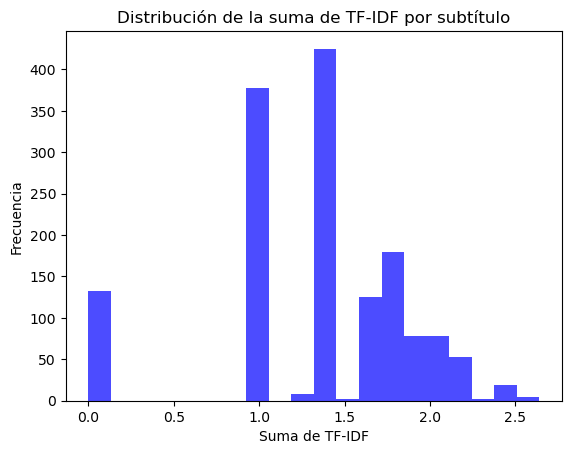

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['tfidf_sum'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de la suma de TF-IDF por subtítulo')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Frecuencia')
plt.show()

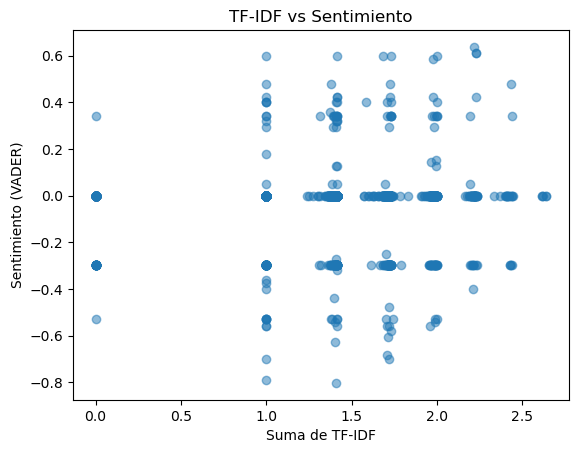

In [48]:
plt.scatter(df['tfidf_sum'], df['sentimientoVader'], alpha=0.5)
plt.title('TF-IDF vs Sentimiento')
plt.xlabel('Suma de TF-IDF')
plt.ylabel('Sentimiento (VADER)')
plt.show()

### Nube de Palabras

In [49]:
X = tfidf.fit_transform(df['subtitulo'])

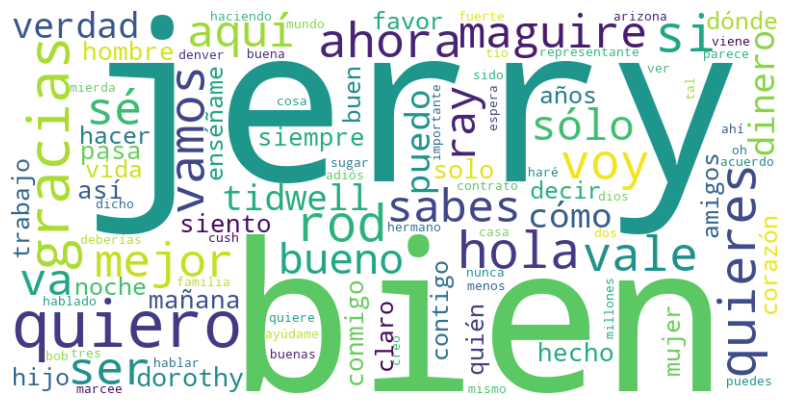

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener las palabras y sus puntuaciones TF-IDF
# Aquí estamos utilizando el atributo `get_feature_names_out()` que te da las palabras,
# y el atributo `toarray()` para obtener las puntuaciones de TF-IDF
words = tfidf.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1  # Sumar las puntuaciones de cada palabra

# Crear un diccionario de palabras con sus correspondientes puntuaciones
word_dict = dict(zip(words, tfidf_scores))

# Generar la nube de palabras con las palabras y puntuaciones obtenidas
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
# Generar la nube de palabras con algunas opciones de personalización
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate_from_frequencies(word_dict)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()